# Análise e exploração de dados

Este ficheiro é para me "ambientar" com o que é pedido.
O "trabalho" oficial está no reposítório **git** da equipa: 
https://bitbucket.org/anadi-rita/anadi/src/main/

~~~bash
git clone git@bitbucket.org:anadi-rita/anadi.git
~~~

## Imports

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utilidades as ut

## Variáveis

In [2]:
proj_root_dir = Path(".").resolve().parent.parent
data_files_dir = "/ficheiros/Trabalho 1/"
ficheiro_dados_co = f"{proj_root_dir}{data_files_dir}CO_data.csv"
ficheiro_dicio_dados_co = f"{proj_root_dir}{data_files_dir}CO_data_dicionario.xlsx"

## Carregar os dados

In [3]:
dados_co = pd.read_csv(
    ficheiro_dados_co,
    delimiter=",",
    header=0,
)

### Espreitar os dados

In [4]:
dados_co.head()

,country,year,population,gdp,cement_co2,co2,coal_co2,energy_per_capita,energy_per_gdp,flaring_co2,gas_co2,methane,nitrous_oxide,oil_co2
0,Afghanistan,1900,4707744.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1901,4751177.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1902,4802500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1903,4861833.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1904,4921891.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Carregar o dicionário

In [5]:
dicionario_dados = pd.read_excel(ficheiro_dicio_dados_co)

## Análise e exploração de dados

Ponto 4.1 do trabalho

### Ponto 1
Construa um gráfico que permita visualizar as emissões totais de CO2 de Portugal no período 1900-2021. Encontre o ano em que foi emitido um valor máximo de CO2

#### Extrair os dados de Portugal

In [6]:
dados_co_pt = dados_co[dados_co.country == "Portugal"]

In [7]:
dados_co_pt_plt = dados_co_pt.loc[:, ["year", "co2"]]

In [8]:
dados_co_pt_plt.head()

,year,co2
24456,1900,2.466
24457,1901,2.389
24458,1902,2.620
24459,1903,2.521
24460,1904,2.579


#### Cálcular o máximo

In [9]:
maximo_co2 = dados_co_pt_plt["co2"].max()
maximo_co2

69.718

In [10]:
ano_maximo_co2 = dados_co_pt_plt.loc[dados_co_pt_plt["co2"].idxmax(), "year"]
ano_maximo_co2

2005

#### Interface implicita

Text(0, 3, 'Máximo emissão (2005)')

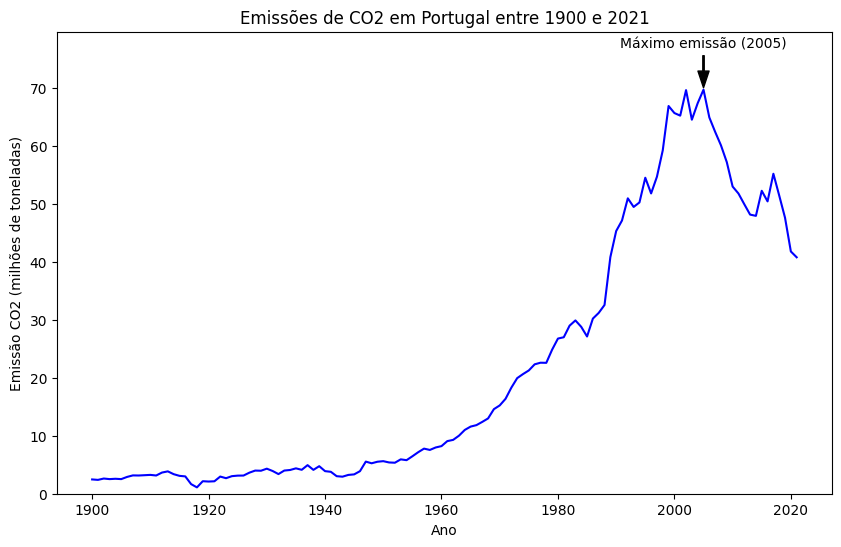

In [11]:
plt.figure(
    figsize=(10, 6),
)
plt.plot("year", "co2", data=dados_co_pt_plt, color="blue")
plt.xlabel("Ano")
plt.ylabel("Emissão CO2 (milhões de toneladas)")
plt.title("Emissões de CO2 em Portugal entre 1900 e 2021")
plt.ylim(0, maximo_co2 + 10)
plt.annotate(
    f"Máximo emissão ({ano_maximo_co2})",
    xy=(ano_maximo_co2, maximo_co2),  # Ponto a anotar
    xycoords="data",  # Sistema de coordenadas do ponto a anotar 
    xytext=(0, 3), # Offset do texto em relação ao ponto anotado
    textcoords="offset fontsize",  # Sistema de coordenadas do texto
    horizontalalignment="center",
    arrowprops=dict(
        facecolor='black',
        width=1,
        headwidth=8,
        shrink=0.05,
    )
)

#### Interface explicita

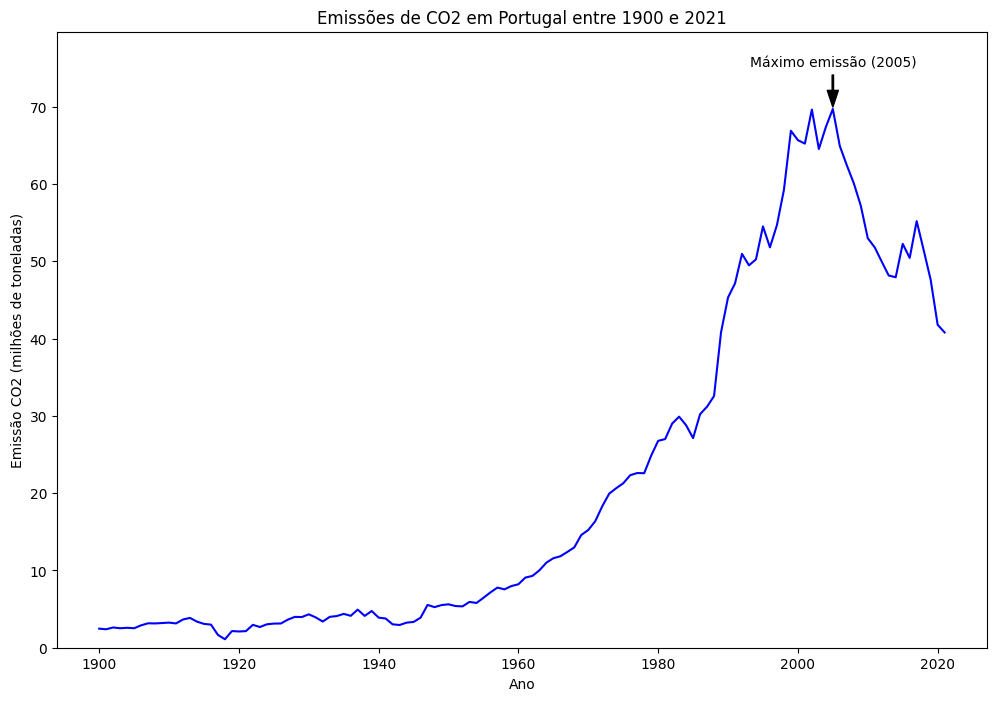

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))
linha = ax.plot(
    "year",  # Seria a utilizar para o eixo dos XX.
    "co2",  # Seria a utilizar para o eixo dos YY.
    data=dados_co_pt_plt,  # Estrutura de dados a utilizar, neste caso 1 DataFrame. 
    color="blue",  # Cor da "linha".
)
# Configuraçao do ``Axes``.
ax.set_title("Emissões de CO2 em Portugal entre 1900 e 2021")
ax.set_xlabel("Ano")
ax.set_ylabel("Emissão CO2 (milhões de toneladas)")
ax.set_ylim(0, maximo_co2 + 10)
# Anotação do ponto máximo, o cálculo é feito anteriormente. 
ax.annotate(
    f"Máximo emissão ({ano_maximo_co2})",
    xy=(ano_maximo_co2, maximo_co2),  # Ponto a anotar
    xycoords="data",  # Sistema de coordenadas do ponto a anotar 
    xytext=(0, 3), # Offset do texto em relação ao ponto anotado
    textcoords="offset fontsize",  # Sistema de coordenadas do texto
    horizontalalignment="center",
    arrowprops=dict(
        facecolor='black',
        width=1,
        headwidth=8,
        shrink=0.05,
    )
)
plt.show()